In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)

In [2]:
# Load the dataset
data = pd.read_csv("breast-cancer.csv")

In [3]:
# Display basic information
print("Dataset Info:\n")
print(data.info())
print("\nFirst 5 Rows:\n", data.head())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [4]:
# Drop unnecessary columns (e.g., 'id')
data.drop(columns=["id"], inplace=True)

In [5]:
# Encode the target variable
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})  # Malignant = 1, Benign = 0

In [6]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Feature-target split
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
 #Step 2: Data Exploration and Visualization

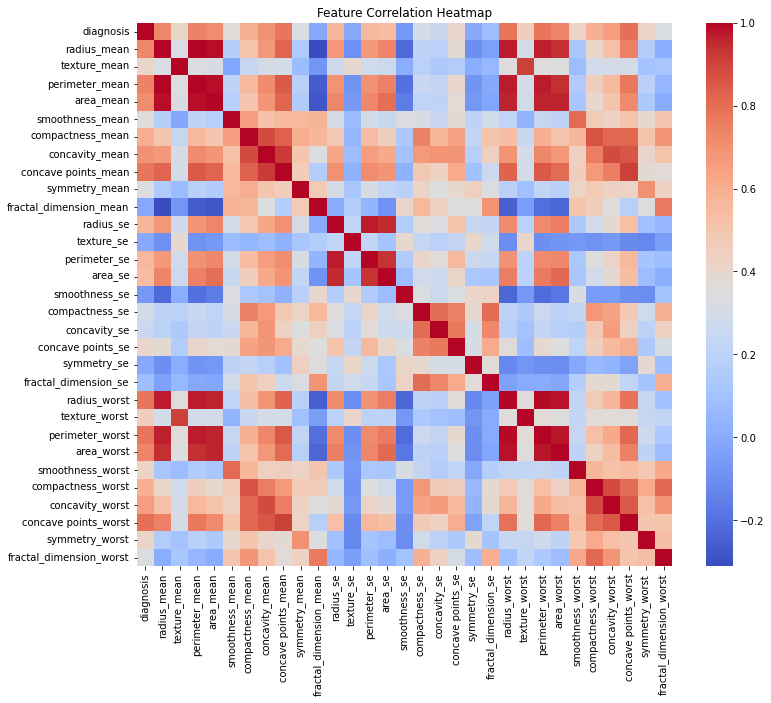

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

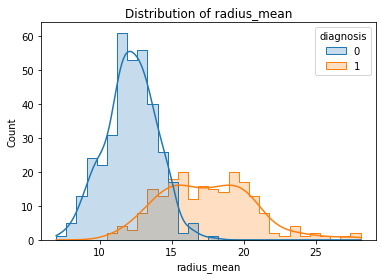

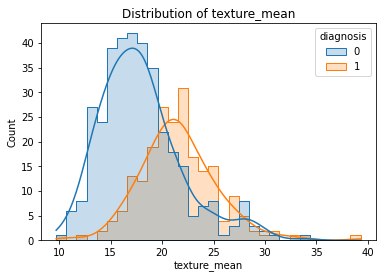

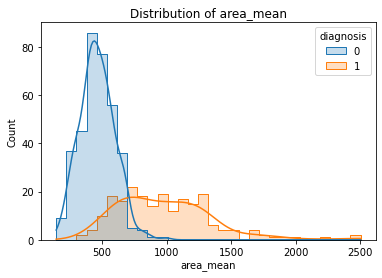

In [12]:
# Feature distribution plot
for feature in ["radius_mean", "texture_mean", "area_mean"]:
    sns.histplot(data, x=feature, hue="diagnosis", kde=True, bins=30, element="step")
    plt.title(f"Distribution of {feature}")
    plt.show()

In [13]:
Step 3: Decision Tree Model

In [14]:
# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

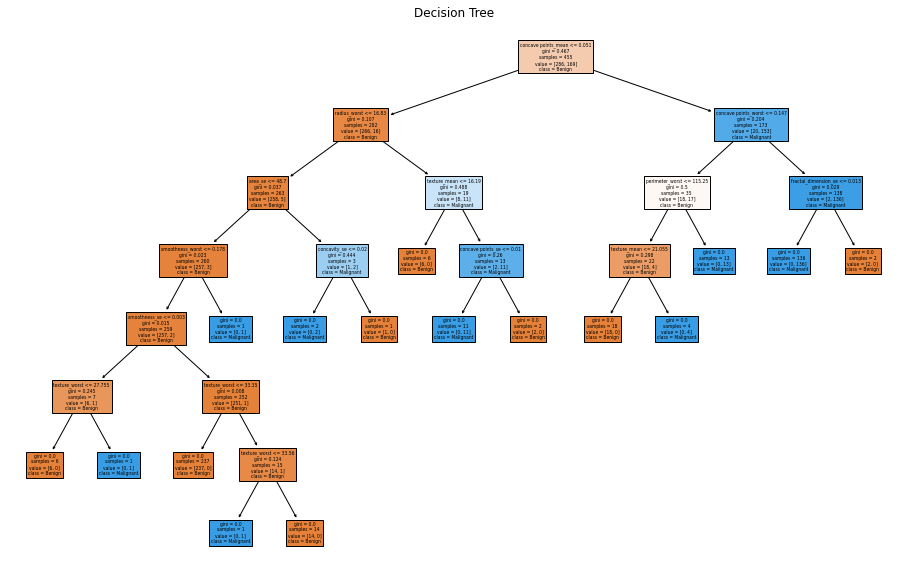

In [15]:
# Plot the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
plt.title("Decision Tree")
plt.show()

In [16]:
# Evaluate Decision Tree
y_pred_tree = decision_tree.predict(X_test)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[68  3]
 [ 3 40]]


In [17]:
#Step 4: Random Forest Model

In [18]:
# Train Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

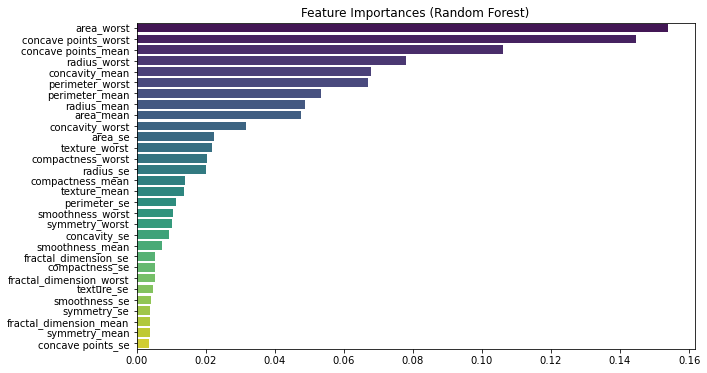

In [19]:
# Feature importance visualization
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(y=X.columns[indices], x=importances[indices], palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.show()

In [20]:
# Evaluate Random Forest
y_pred_forest = random_forest.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [21]:
# Step 5: Advanced Evaluation (ROC Curve)

In [22]:
# ROC-AUC for Random Forest
y_proba_forest = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_forest)
roc_auc = auc(fpr, tpr)

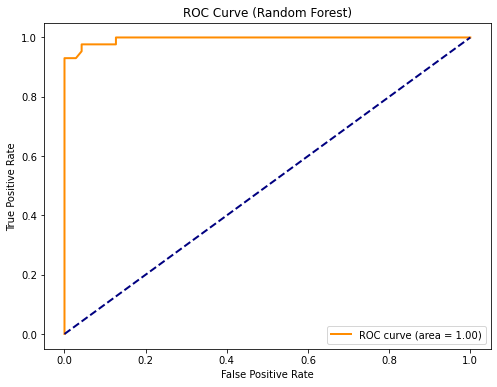

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend(loc="lower right")
plt.show()

In [24]:
# Step 6: Hyperparameter Tuning with GridSearchCV

In [25]:
# Grid search for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [27]:
# Summary

In [28]:
print("Baseline Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))

Baseline Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
Tuned Random Forest Accuracy: 0.9649122807017544
